In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

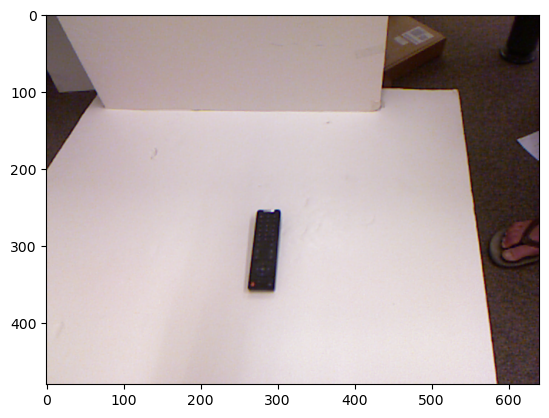

In [2]:
sample = './Data/01/pcd0100r.png'
img = Image.open(sample)
plt.imshow(img)
plt.show()


In [3]:
cpos = './Data/01/pcd0100cpos.txt'
positive_examples = np.loadtxt(cpos)
cneg = './Data/01/pcd0100cneg.txt'
negative_examples = np.loadtxt(cneg)

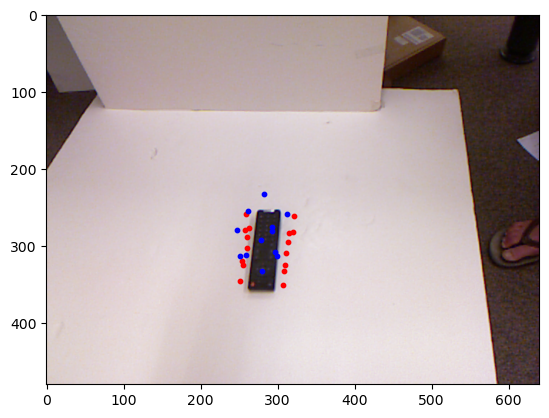

In [4]:
plt.imshow(img)
plt.scatter(positive_examples[:,0], positive_examples[:,1], c='r', s=10)
plt.scatter(negative_examples[:,0], negative_examples[:,1], c='b', s=10)
plt.show()

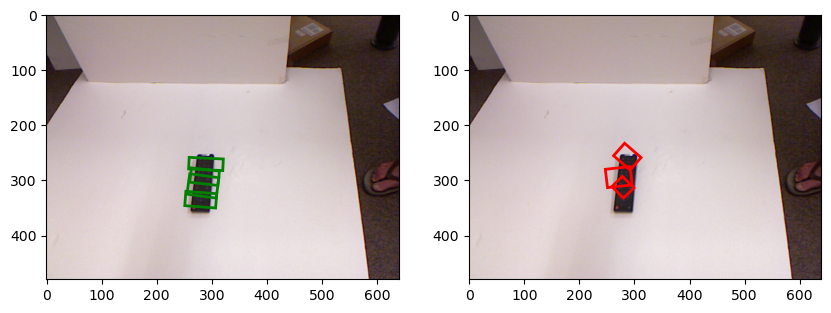

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
ax1.imshow(img)
for i in range(0, len(positive_examples), 4):
    rect_coords = positive_examples[i:i+4]
    rect = patches.Polygon(rect_coords, closed=True, linewidth=2, edgecolor='g', facecolor='none')
    ax1.add_patch(rect)

ax2.imshow(img)
for i in range(0, len(negative_examples), 4):
    rect_coords = negative_examples[i:i+4]
    rect = patches.Polygon(rect_coords, closed=True, linewidth=2, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

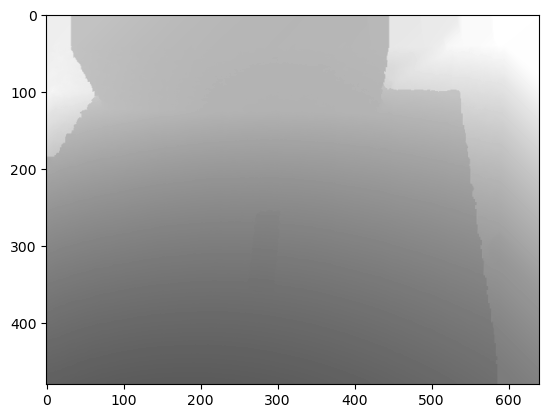

In [6]:
d = './Data/01/pcd0100d.tiff'
depth = Image.open(d)
depth = np.array(depth)
plt.imshow(depth, cmap='gray')
plt.show()

In [7]:
# PCD file
pcd = './Data/01/pcd0100.txt'
pcd = np.loadtxt(pcd, skiprows=10)

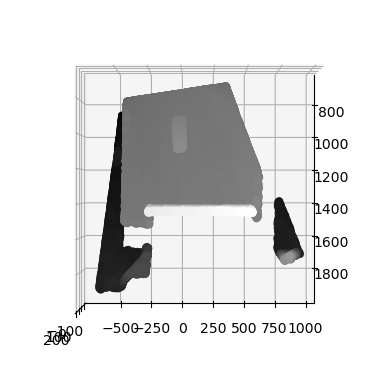

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcd[:,0], pcd[:,1], pcd[:,2], c=pcd[:,2], cmap='gray')
ax.view_init(90, 0)
plt.show()

In [9]:
import cv2
from skimage import color

In [10]:

rgb_sub_patches = []
for i in range(0, len(positive_examples), 4):
    rect_coords = positive_examples[i:i+4]
    rect_coords = np.array(rect_coords, dtype=np.int32)

    x, y, w, h = cv2.boundingRect(rect_coords)
    img_array = np.array(img)
    rgb_sub_patch = img_array[y:y+h, x:x+w, :]
    
    #RGB to YUV
    yuv_sub_patch = color.rgb2yuv(rgb_sub_patch)
    features = yuv_sub_patch
    rgb_sub_patches.append(features)
    
    #To Do: Use (x,y,w,h) to extract the sub-patch from the depth image 




In [11]:
rgb_sub_patches[0].shape

(32, 59, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


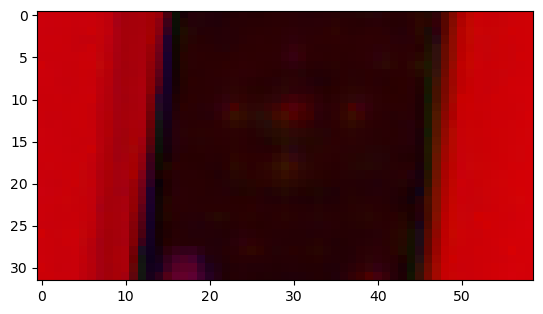

In [12]:
plt.imshow(rgb_sub_patches[0])